In [390]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [391]:
df = pd.read_csv("alcohol-consumption-vs-gdp-per-capita.csv")
df

,Entity,Code,Year,Total alcohol consumption per capita,"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2010,0.21,1957.029070,29185511.0,NaN
2,Afghanistan,AFG,2015,0.21,2068.265904,34413603.0,Asia
3,Afghanistan,AFG,2018,0.21,2033.804389,37171922.0,NaN
4,Afghanistan,AFG,2002,NaN,1189.784668,22600774.0,NaN
...,...,...,...,...,...,...,...
57079,Zimbabwe,ZWE,1987,NaN,NaN,9527202.0,NaN
57080,Zimbabwe,ZWE,1988,NaN,NaN,9849129.0,NaN
57081,Zimbabwe,ZWE,1989,NaN,NaN,10153852.0,NaN
57082,Zimbabwe,ZWE,2021,NaN,NaN,15092171.0,NaN


In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57084 entries, 0 to 57083
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               57084 non-null  object 
 1   Code                                                 54099 non-null  object 
 2   Year                                                 57084 non-null  int64  
 3   Total alcohol consumption per capita                 1164 non-null   float64
 4   GDP per capita, PPP (constant 2017 international $)  7109 non-null   float64
 5   Population (historical estimates)                    55656 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 3.0+ MB


In [393]:
unique_country_codes = df['Code'].dropna().unique()
print(unique_country_codes)
country_code_mapping = {code: index for index, code in enumerate(unique_country_codes)}
df['Code'] = df['Code'].map(country_code_mapping)

df.drop(['Continent'], axis=1, inplace=True)
#unique_continents = df['Continent'].dropna().unique()
#print(unique_continents)
#country_continent_mapping = {continent: index for index, continent in enumerate(unique_continents)}
#df['Continent'] = df['Continent'].map(country_continent_mapping)

['OWID_ABK' 'AFG' 'OWID_AKD' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'AIA' 'ATA'
 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT' 'OWID_AUH' 'AZE' 'OWID_BAD' 'BHS'
 'BHR' 'BGD' 'BRB' 'OWID_BAV' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL'
 'BES' 'BIH' 'BWA' 'BVT' 'BRA' 'IOT' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM'
 'CMR' 'CAN' 'CPV' 'CYM' 'CAF' 'TCD' 'OWID_CIS' 'CHL' 'CHN' 'CXR' 'CCK'
 'COL' 'COM' 'COG' 'COK' 'CRI' 'CIV' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE'
 'OWID_CZS' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'OWID_GDR' 'ECU' 'EGY' 'SLV'
 'GNQ' 'ERI' 'OWID_ERE' 'EST' 'SWZ' 'ETH' 'FRO' 'FLK' 'FJI' 'FIN' 'FRA'
 'GUF' 'PYF' 'ATF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD'
 'GLP' 'GUM' 'GTM' 'GGY' 'GIN' 'GNB' 'GUY' 'HTI' 'OWID_HAN' 'HMD'
 'OWID_HSE' 'OWID_HSG' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ'
 'IRL' 'IMN' 'ISR' 'ITA' 'JAM' 'JPN' 'JEY' 'JOR' 'KAZ' 'KEN' 'KIR'
 'OWID_KOS' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE' 'LTU'
 'LUX' 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MHL' 'MTQ' 'MRT' 'MUS'
 'MYT' 'O

In [394]:
df.isnull().sum()

Entity                                                     0
Code                                                    2985
Year                                                       0
Total alcohol consumption per capita                   55920
GDP per capita, PPP (constant 2017 international $)    49975
Population (historical estimates)                       1428
dtype: int64

In [395]:
df = df.dropna()

In [396]:
df.isnull().sum()

Entity                                                 0
Code                                                   0
Year                                                   0
Total alcohol consumption per capita                   0
GDP per capita, PPP (constant 2017 international $)    0
Population (historical estimates)                      0
dtype: int64

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886 entries, 1 to 56828
Data columns (total 6 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               886 non-null    object 
 1   Code                                                 886 non-null    float64
 2   Year                                                 886 non-null    int64  
 3   Total alcohol consumption per capita                 886 non-null    float64
 4   GDP per capita, PPP (constant 2017 international $)  886 non-null    float64
 5   Population (historical estimates)                    886 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 48.5+ KB


In [398]:
x = df.loc[:, ['Year', 'Code', 'Total alcohol consumption per capita','GDP per capita, PPP (constant 2017 international $)','Population (historical estimates)']].values

print(x.shape)
x_data  = pd.DataFrame(x)
x_data.head()

(886, 5)


,0,1,2,3,4
0,2010.0,1.0,0.21,1957.029070,29185511.0
1,2015.0,1.0,0.21,2068.265904,34413603.0
2,2018.0,1.0,0.21,2033.804389,37171922.0
3,2000.0,3.0,6.57,5893.136233,3129246.0
4,2005.0,3.0,7.65,8040.878717,3086810.0


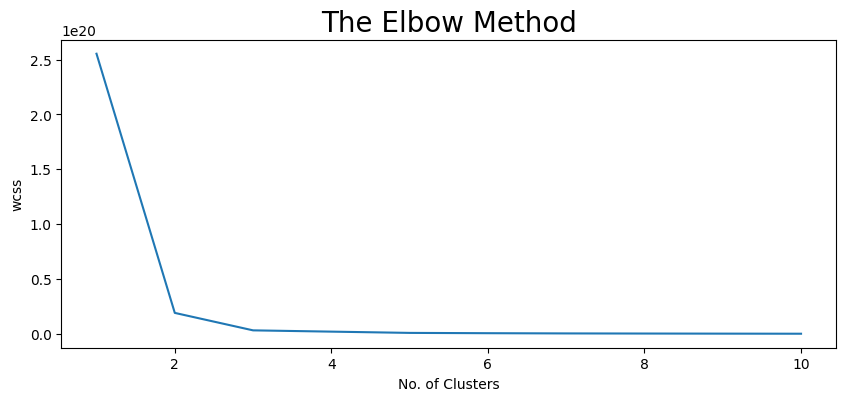

In [399]:
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

# lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [400]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# lets find out the Results
a = df['Total alcohol consumption per capita']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

In [401]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_her= hc.fit_predict(x)

/Users/admin/Desktop/ML_RegressionProj/env/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


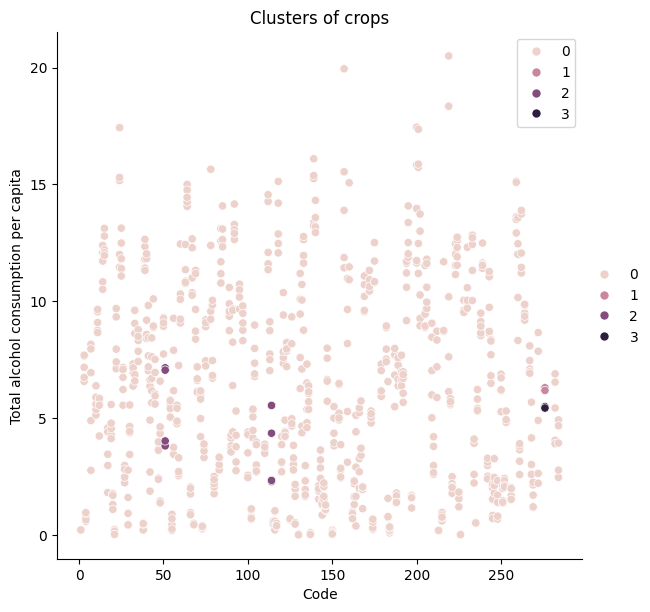

In [403]:
sns.relplot(
    x="Code", y="Total alcohol consumption per capita", hue=y_her, data=df, height=6,
); 
plt.title('Clusters of crops')  
plt.legend()  
plt.show()